In [9]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import emoji
from ipywidgets import Layout, interact, IntSlider,Label, HBox
import ipywidgets as widgets
import os
import sys
import h5py
from pathlib import Path
%matplotlib inline

In [2]:
inclination = IntSlider(min=0,max=180,step=1) 
inclination_box = HBox([Label('Inclination (Deg):'), inclination])

image_width = IntSlider(min=50,max=500,step=1)
image_width_box = HBox([Label('Image Width (Pixels):'), image_width])

image_height = IntSlider(min=50,max=500,step=1)
image_height_box = HBox([Label('Image Height (Pixels):'), image_height])

cam_x = IntSlider(min=15,max=20,step=1)
cam_x_box = HBox([Label('Camera Size (X):'), cam_x])

cam_y = IntSlider(min=15,max=20,step=1)
cam_y_box = HBox([Label('Camera Size (Y):'), cam_y])

Frequency = IntSlider(min=10,max=30,step=1)
Frequency_box = HBox([Label('Frequency (x $10^{10}$) Hz:'), Frequency])

display(inclination_box)
display(image_width_box)
display(image_height_box)
display(cam_x_box)
display(cam_y_box)
display(Frequency_box)

In [10]:
MBH=6.2e9
DISTANCE = 3945 #kpc
M_UNIT=2.739e25
R_LOW=1
R_HIGH=1

INCLINATION = inclination.value
IMG_WIDTH = image_width.value
IMG_HEIGHT = image_height.value
CAM_SIZE_X = cam_x.value
CAM_SIZE_Y = cam_y.value
FREQS_PER_DEC=1
FREQ_MIN = Frequency.value*1.e10
STEPSIZE = 0.05
MAX_LEVEL = 1
#Writing the model.in file 
f = open('model.in','r')
text = f.readlines()
f.close()
text[0] = 'MBH\t\t(Msun)\t\t%.15e\n'%(MBH)
text[1] = 'MBH\t\t(kpc)\t\t%.15e\n'%(DISTANCE)
text[2] = 'M_UNIT\t\t(g)\t\t%.15e\n'%(M_UNIT)
text[3] = 'Rhigh\t\t(-)\t\t%d\n'%(R_LOW)
text[4] = 'Rlow\t\t(-)\t\t%d\n'%(R_HIGH)

text[5] = 'INCLINATION\t(deg)\t%d\n'%(INCLINATION)
text[6] = 'IMG_WIDTH\t(pixels)\t%d\n'%(IMG_WIDTH)
text[7] = 'IMG_HEIGHT\t(pixels)\t%d\n'%(IMG_HEIGHT)
text[8] = 'CAM_SIZE_X\t(Rg)\t\t%.15e\n'%(CAM_SIZE_X)
text[9] = 'CAM_SIZE_Y\t(Rg)\t\t%.15e\n'%(CAM_SIZE_Y)
text[10] = 'FREQS_PER_DEC\t(-)\t\t%d\n'%(FREQS_PER_DEC)
text[11] = 'FREQ_MIN\t(Hz)\t\t%.15e\n'%(FREQ_MIN)
text[12] = 'STEPSIZE\t(-)\t\t%.15e\n'%(STEPSIZE)
text[13] = 'MAX_LEVEL\t(-)\t\t%d\n'%(MAX_LEVEL)
f = open('model.in','w')
f.writelines(text)
f.close()

In [11]:
%%bash
./RAPTOR model.in bhac_data/data0202.dat 10


Using model parameter file model.in


__________    _____ _____________________________ __________
\______   \  /  _  \\______   \__    ___/\_____  \\______   \
 |       _/ /  /_\  \|     ___/ |    |    /   |   \|       _/
 |    |   \/    |    \    |     |    |   /    |    \    |   \
 |____|_  /\____|__  /____|     |____|   \_______  /____|_  /
        \/         \/                            \/       \/  

Running RAPTOR v1.0 in unpolarized mode!

Initializing...

Model parameters:

MBH 		= 6.2e+09 Msun
DISTANCE 	= 3945 kpc
M_UNIT 		= 2.739e+25 grams
R_LOW 		= 1 
R_HIGH 		= 1 
INCLINATION 	= 163 deg
METRIC 		= MKS BHAC

Observer parameters:

IMG_WIDTH 	= 401 
IMG_HEIGHT 	= 401 
CAM_SIZE_X 	= 20 GM/c2
CAM_SIZE_Y 	= 20 GM/c2
FREQS_PER_DEC 	= 1 
FREQ_MIN 	= 2.6e+11 Hz
STEPSIZE 	= 0.05 

Starting read in of BHAC GRMHD data...

Successfully opened bhac_data/data0202.dat. 

Reading...Done

Number of frequencies to compute: 1
freq = +2.600000000000000e+11

Starting ray tracing

100 Done
90 Done
90 Done
90 Done
90 Done
90 Done
90

Reading keys from:  output/img_data_10.h5
['I2.600000e+11', 'alpha', 'beta']
Reading in:  output/img_data_10.h5
3


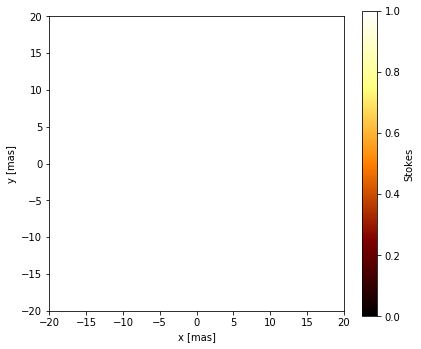

In [12]:
import rapplot

M=6.5e9 * rapplot.MSUN
d=16800 * rapplot.KPC

rg = (rapplot.G*M/rapplot.SPEED_OF_LIGHT**2.)

mas = (rg/d)* rapplot.MAS_IN_DEG

Tunit =rg/rapplot.SPEED_OF_LIGHT

halfrange=20 #in rg

ind = rapplot.read_data_id('output',10)
min,max,image = rapplot.read_data('output',10,ind)
fig, ax = plt.subplots(1,1,figsize=(6,5))
p = rapplot.plot_data_stokes(image,min,max,0,ind,fig,ax,halfrange=20,mas=1,label="Stokes",cmap="afmhot")

ax.set_xlabel(r"x [mas]")
ax.set_ylabel(r"y [mas]")

plt.tight_layout()
Path("figures/").mkdir(parents=True, exist_ok=True)
plt.show()